# Spray Sample Distribution

In [221]:
from util.spray_util import load_catalog

spray_directory = "../res/sprays2"
df = load_catalog(spray_directory)

df

,match_id,map_id,player_id,filename,length
0,92650,0,76561198257770857,97.npy,7
1,92650,0,76561199016517194,164.npy,7
2,92650,0,76561198453919902,136.npy,6
3,92650,0,76561197961460718,25.npy,8
4,92650,0,76561197961460718,4.npy,9
...,...,...,...,...,...
3128,92614,0,76561198044045107,68.npy,5
3129,92614,0,76561198044045107,59.npy,5
3130,92614,0,76561198044045107,105.npy,5
3131,92614,0,76561197995817501,21.npy,5


In [222]:
print("unique players:", len(df.player_id.unique()))

unique players: 578


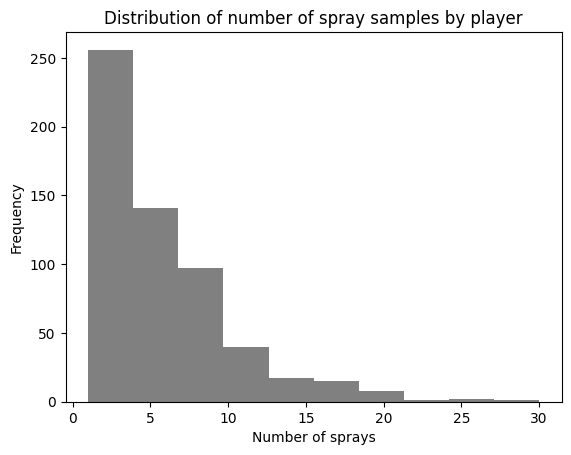

In [223]:
from matplotlib import pyplot as plt

df.groupby("player_id").size().plot(kind="hist", color="gray", xlabel="Number of sprays",
                                    title="Distribution of number of spray samples by player",
                                    bins=10)
plt.show()

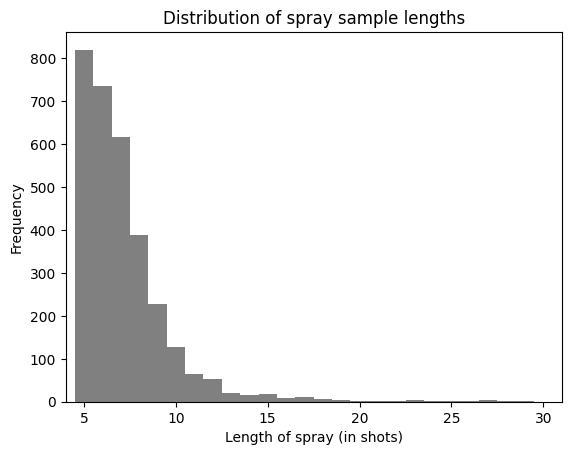

In [224]:
plt.hist(df["length"], bins=25, align="left", color="gray")
plt.xlim(4, 31)
plt.xlabel("Length of spray (in shots)")
plt.ylabel("Frequency")
plt.title("Distribution of spray sample lengths")
plt.show()

In [225]:
total_shots = int(df["length"].sum())
print("total shots", total_shots)

# rds * mins/rds = mins
total_mins = (total_shots - df.shape[0]) / 60
print("total minutes", total_mins)

total_hours = total_mins / 60
print("total hours", total_hours)

total shots 22297
total minutes 319.4
total hours 5.323333333333333


In [226]:
total_matches = int(df["match_id"].unique().shape[0])
print("total matches", total_matches)

total_dems = int(df[["match_id", "map_id"]].drop_duplicates().shape[0])
print("total .dems", total_dems)

total matches 251
total .dems 495


# Spray Shot Distribution

In [227]:
import os

import numpy as np

# limit sprays to first few bullets
length = 6
filtered_df = df[df["length"] == length].reset_index(drop=True)

data = []
for i, row in filtered_df.iterrows():
    filename = f"{row.match_id}/{row.map_id}/{row.player_id}/{row.filename}"
    filepath = os.path.join(spray_directory, filename)
    array = np.load(filepath)
    data.append(array)

len(data)

735

In [228]:
pitches = []
yaws = []
for spray in data:
    pitches.extend(spray[1:, 0])
    yaws.extend(spray[1:, 1])

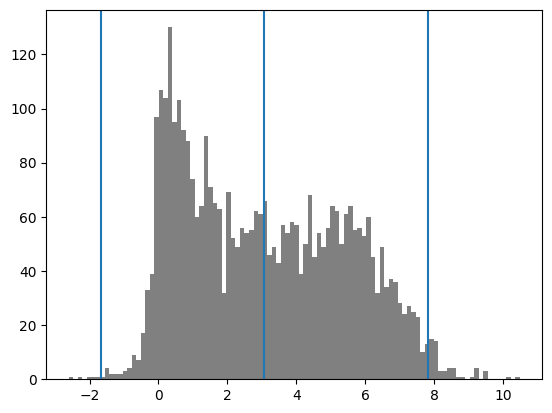

In [229]:
pitches_mean, pitches_std = np.mean(pitches), np.std(pitches)
plt.hist(pitches, bins=100, color="gray")
plt.axvline(pitches_mean)
plt.axvline(pitches_mean - 2 * pitches_std)
plt.axvline(pitches_mean + 2 * pitches_std)
plt.show()

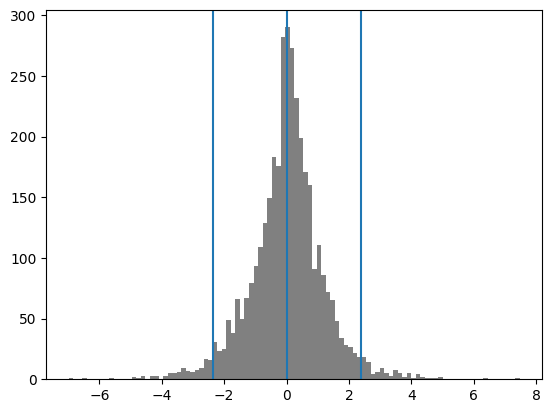

In [230]:
yaws_mean, yaws_std = np.mean(yaws), np.std(yaws)
plt.hist(yaws, bins=100, color="gray")
plt.axvline(yaws_mean)
plt.axvline(yaws_mean - 2 * yaws_std)
plt.axvline(yaws_mean + 2 * yaws_std)
plt.show()

In [231]:
max_abs_pitches = []
max_abs_yaws = []
for spray in data:
    max_abs_pitches.append(np.max(np.abs(spray[:, 0])))
    max_abs_yaws.append(np.max(np.abs(spray[:, 1])))

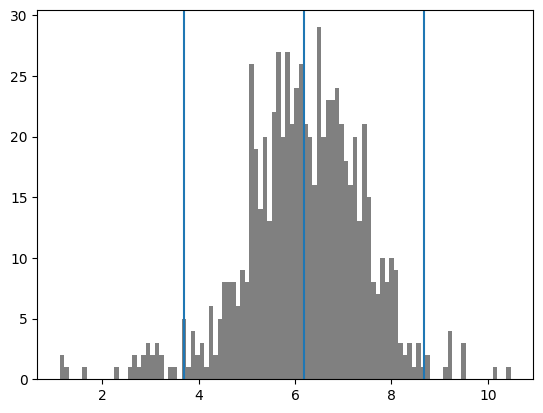

In [232]:
max_abs_pitches_mean, max_abs_pitches_std = np.mean(max_abs_pitches), np.std(max_abs_pitches)
plt.hist(max_abs_pitches, bins=100, color="gray")
plt.axvline(max_abs_pitches_mean)
plt.axvline(max_abs_pitches_mean - 2 * max_abs_pitches_std)
plt.axvline(max_abs_pitches_mean + 2 * max_abs_pitches_std)
plt.show()

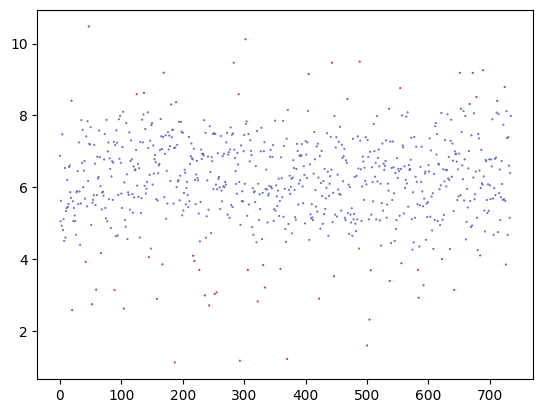

In [233]:
alpha = 1.6
max_abs_pitches_outliers = (max_abs_pitches > max_abs_pitches_mean + alpha * max_abs_pitches_std) | \
                           (max_abs_pitches < max_abs_pitches_mean - alpha * max_abs_pitches_std)

plt.scatter(np.arange(len(max_abs_pitches)), max_abs_pitches, s=0.2, c=max_abs_pitches_outliers, cmap="coolwarm")
plt.show()

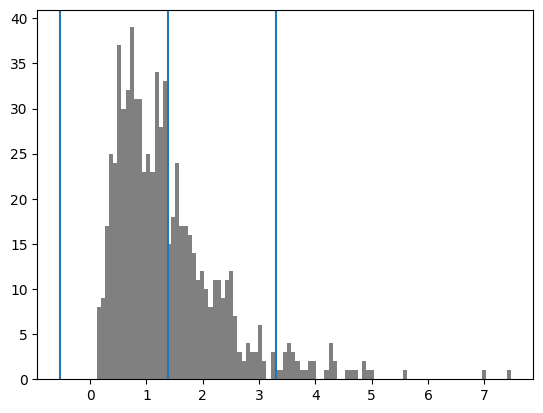

In [234]:
max_abs_yaws_mean, max_abs_yaws_std = np.mean(max_abs_yaws), np.std(max_abs_yaws)
plt.hist(max_abs_yaws, bins=100, color="gray")
plt.axvline(max_abs_yaws_mean)
plt.axvline(max_abs_yaws_mean - 2 * max_abs_yaws_std)
plt.axvline(max_abs_yaws_mean + 2 * max_abs_yaws_std)
plt.show()

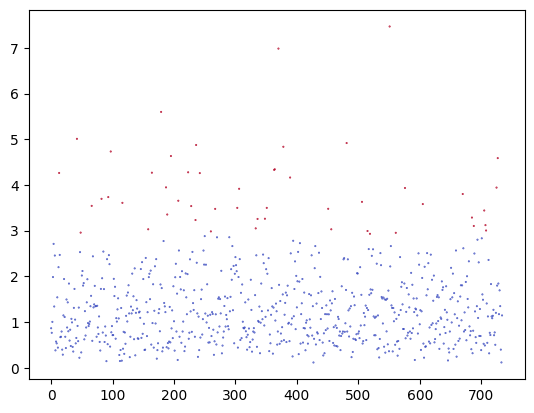

In [235]:
beta = 1.6
max_abs_yaws_outliers = (max_abs_yaws > max_abs_yaws_mean + beta * max_abs_yaws_std) | \
                        (max_abs_yaws < max_abs_yaws_mean - beta * max_abs_yaws_std)

plt.scatter(np.arange(len(max_abs_yaws)), max_abs_yaws, s=0.2, c=max_abs_yaws_outliers, cmap="coolwarm")
plt.show()

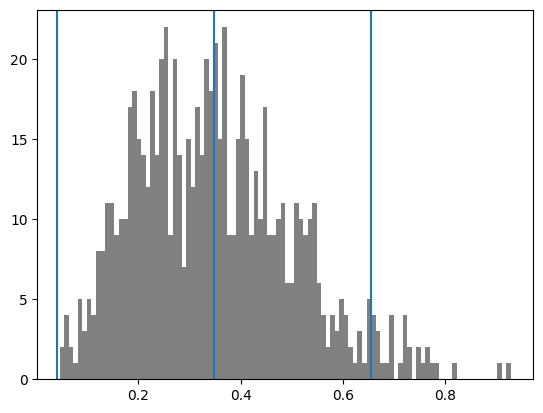

In [236]:
log_max_abs_yaws = np.log10(np.add(1, max_abs_yaws))
log_max_abs_yaws_mean, log_max_abs_yaws_std = np.mean(log_max_abs_yaws), np.std(log_max_abs_yaws)
plt.hist(log_max_abs_yaws, bins=100, color="gray")
plt.axvline(log_max_abs_yaws_mean)
plt.axvline(log_max_abs_yaws_mean - 2 * log_max_abs_yaws_std)
plt.axvline(log_max_abs_yaws_mean + 2 * log_max_abs_yaws_std)
plt.show()

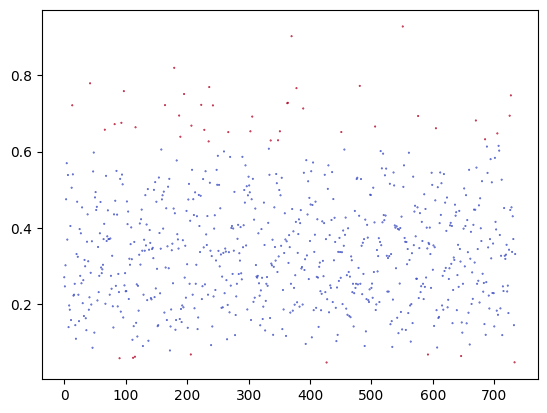

In [237]:
gamma = 1.8
log_max_abs_yaws_outliers = (log_max_abs_yaws > log_max_abs_yaws_mean + gamma * log_max_abs_yaws_std) | \
                            (log_max_abs_yaws < log_max_abs_yaws_mean - gamma * log_max_abs_yaws_std)

plt.scatter(np.arange(len(log_max_abs_yaws)), log_max_abs_yaws, s=0.2, c=log_max_abs_yaws_outliers, cmap="coolwarm")
plt.show()

In [238]:
outliers = max_abs_pitches_outliers | max_abs_yaws_outliers
print("outliers:", len(filtered_df[outliers]))

filtered_df_no_outliers = filtered_df[~outliers]
filtered_df_no_outliers

outliers: 106


,match_id,map_id,player_id,filename,length
0,92650,0,76561198453919902,136.npy,6
1,92650,1,76561197963277583,22.npy,6
2,92805,1,76561198371036559,219.npy,6
3,92657,0,76561198799340122,149.npy,6
4,92657,1,76561198160709585,111.npy,6
...,...,...,...,...,...
730,92848,1,76561197961491680,2.npy,6
731,92848,2,76561198078771373,116.npy,6
732,92884,0,76561197978835160,43.npy,6
733,92884,0,76561198316706174,163.npy,6


In [239]:
print("unique players:", len(filtered_df_no_outliers.player_id.unique()))

np.save("../../res/outliers.npy", outliers)
filtered_df_no_outliers.to_csv("../res/spray_df_no_outliers.csv")

unique players: 340


# Shot Distribution

(735, 6, 2)


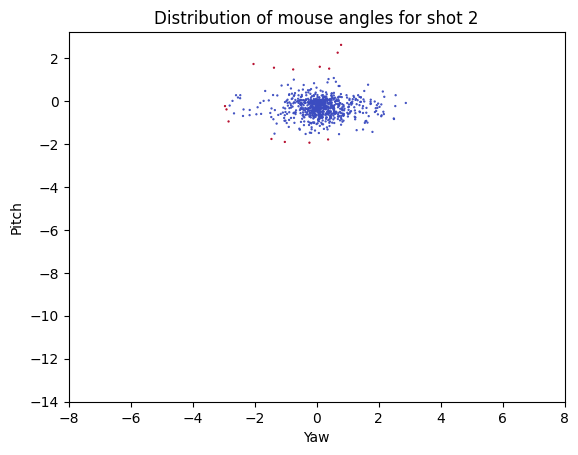

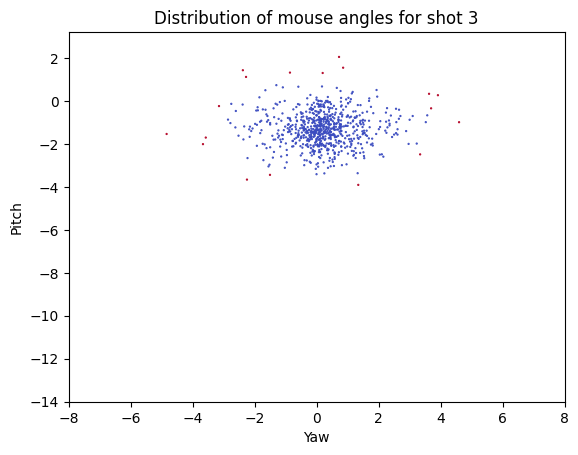

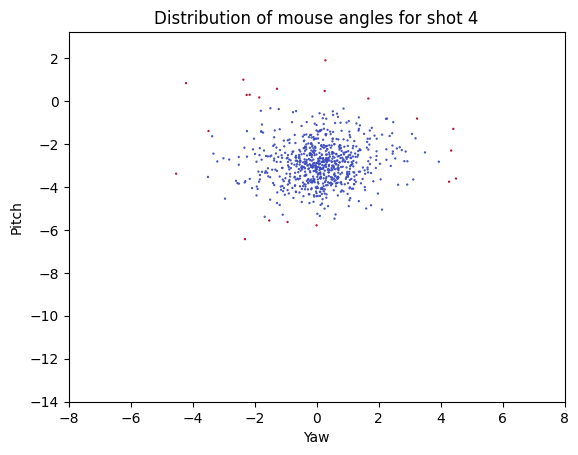

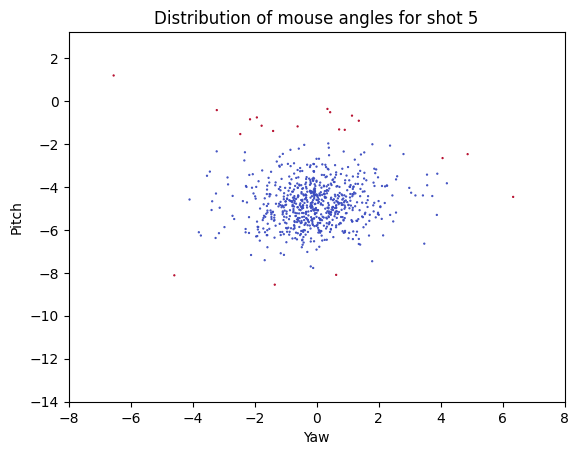

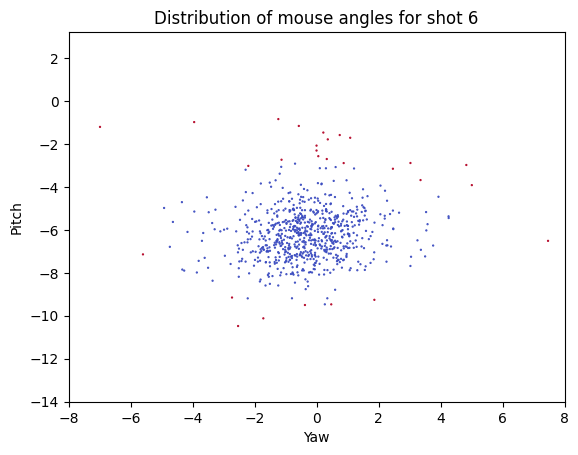

In [240]:
shots = np.stack(data)
print(shots.shape)

shots_mean = np.mean(shots, axis=0)

scale_factors = np.array([
    [1, 1],
    [2, 1],
    [1.5, 1],
    [1.5, 1],
    [1.5, 1],
    [1.5, 1],
    # [1.5, 1],
    # [1.5, 1],
    # [1.5, 1],
    # [1.5, 1],
    # [1.5, 1],
])
threshold = np.array([1, 3, 3.6, 4.2, 5, 5, ])  #5, 5, 5, 5, 5])
shots_centered = (shots - shots_mean) * scale_factors
distance_from_origin = np.sqrt(np.sum(np.square(shots_centered), axis=-1))
shots_outliers = distance_from_origin > threshold


def plot_bullets(shot_i):
    x, y, c = [], [], []

    for shot, shot_outliers in zip(shots, shots_outliers):
        x.append(shot[shot_i, 1])
        y.append(-shot[shot_i, 0])
        c.append(1 if shot_outliers[shot_i] else 0)
    plt.scatter(x, y, c=c, s=0.4, cmap="coolwarm")
    plt.xlabel("Yaw")
    plt.ylabel("Pitch")
    plt.title(f"Distribution of mouse angles for shot {shot_i + 1}")
    plt.xlim(-8, 8)
    plt.ylim(-14, 3.2)
    plt.show()


# shot 1 is always at (0, 0)
# plot_bullets(0)
plot_bullets(1)
plot_bullets(2)
plot_bullets(3)
plot_bullets(4)
plot_bullets(5)
# plot_bullets(6)
# plot_bullets(7)
# plot_bullets(8)
# plot_bullets(9)
# plot_bullets(10)

In [241]:
shots_filtered = shots[~np.any(shots_outliers, axis=1)]
shots_filtered.shape

(682, 6, 2)

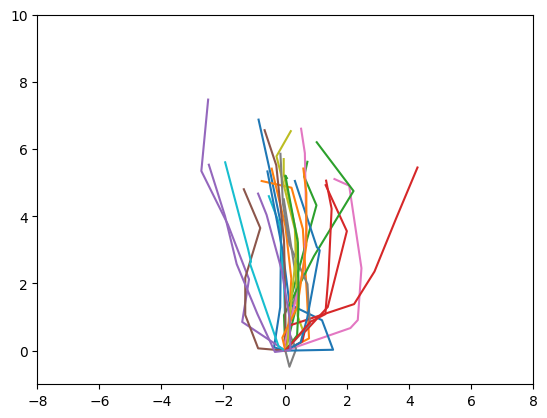

In [242]:
for spray in shots_filtered[:25]:
    plt.plot(spray[:, 1], spray[:, 0])
plt.xlim(-8, 8)
plt.ylim(-1, 10)
plt.show()

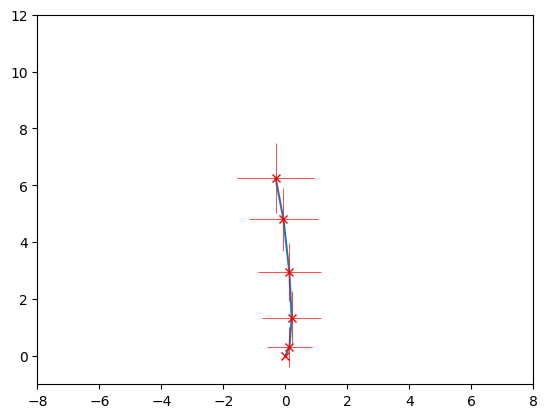

In [243]:
def plot_average():
    mean, std = shots_filtered.mean(axis=0), shots_filtered.std(axis=0)
    plt.plot(mean[:, 1], mean[:, 0])
    plt.errorbar(mean[:, 1], mean[:, 0], xerr=std[:, 1], yerr=std[:, 1], fmt="x", elinewidth=0.5, color="red")
    plt.xlim(-8, 8)
    plt.ylim(-1, 12)
    plt.show()


plot_average()